# Deep Learning
MATH70116<br>
Autumn 2024-2025<br>
Lecturer: Lukas Gonon

## Implementing Neural Networks in Keras

First, we import <b>Keras</b> (this requires that <b>TensorFlow</b> is installed):


In [2]:
! pip install TensorFlow

     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.7/390.3 MB 23.1 MB/s eta 0:00:17
   ---------------------------------------- 1.3/390.3 MB 17.1 MB/s eta 0:00:23
   ---------------------------------------- 2.1/390.3 MB 16.8 MB/s eta 0:00:24
   ---------------------------------------- 3.0/390.3 MB 17.6 MB/s eta 0:00:22
   ---------------------------------------- 4.1/390.3 MB 20.0 MB/s eta 0:00:20
    --------------------------------------- 5.1/390.3 MB 19.2 MB/s eta 0:00:21
    --------------------------------------- 6.1/390.3 MB 19.4 MB/s eta 0:00:20
    --------------------------------------- 7.1/390.3 MB 20.5 MB/s eta 0:00:19
    --------------------------------------- 8.0/390.3 MB 20.4 MB/s eta 0:00:19
    --------------------------------------- 8.7/390.3 MB 19.9 MB/s

<small> (If you choose to work with Anaconda Navigator to manage your Python installation, a configuration that can be easily installed is as follows: create a new environment with Python 3.8 and install the packages matplotlib, tensorflow and pydot. Then you can launch jupyter in that environment.)</small>

In [2]:
import tensorflow.keras as keras

Second, for later use we import <b>NumPy</b> and <b>matplotlib</b> (and set a nicer plotting style).

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

We now specify a feedforward neural network with, for example,  $r=3$, $I=d_0=2$, $d_1=100$, $d_2=100$, $O=d_3=1$, $\sigma_1(x)=\sigma_2(x)=\mathrm{ReLU}(x)=\max(x,0)$, $\sigma_3(x)=x$ as follows. A shorthand notation that we will use for such a network is
$$
f \in \mathcal{N}_3(2,100,100,1;\mathrm{ReLU},\mathrm{ReLU},\mathrm{Id}).
$$

Specifying such a neural network can be done using the <code>Sequential</code> model of Keras by:

In [5]:
f = keras.Sequential([
    keras.layers.InputLayer(shape=(2,)),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1, activation="linear")
])

An alternative, but equivalent, way of doing the same using the <code>add</code> method is:

In [6]:
f = keras.Sequential()
f.add(keras.layers.InputLayer(input_shape=(2,)))
f.add(keras.layers.Dense(100, activation="relu"))
f.add(keras.layers.Dense(100, activation="relu"))
f.add(keras.layers.Dense(1, activation="linear"))

The <code>summary</code> method lets us summarise the specified architecture of the network $f$ and its parameters.

In [7]:
f.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 100)            │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,501 (41.02 KB)

 Trainable params: 10,501 (41.02 KB)

 Non-trainable params: 0 (0.00 B)

We can also visualise the architecture using the function <code>plot_model</code> in <code>keras.utils</code>. (Which is particularly helpful when we have built a model with complicated routings.)

In [8]:
keras.utils.plot_model(f, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


We can remove the final layer of the network using the <code>pop</code> method:

In [9]:
f.pop()

<Dense name=dense_5, built=True>

We should then get $f \in \mathcal{N}_2(2,100,100;\mathrm{ReLU},\mathrm{ReLU})$, which we can verify with the <code>summary</code> method.

In [10]:
f.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 100)            │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        10,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,400 (40.62 KB)

 Trainable params: 10,400 (40.62 KB)

 Non-trainable params: 0 (0.00 B)

Let us however <code>add</code> the deleted layer back to the network $f$: 

In [11]:
f.add(keras.layers.Dense(1, activation="linear"))

We can study the layers of the network using the <code>get_layer</code> method. If we are, for example, interested in extracting the layer $\boldsymbol{L}_1(\boldsymbol{x}) = W^1\boldsymbol{x} + \boldsymbol{b}^1$, $\boldsymbol{x} \in \mathbb{R}^2$, we can do it as follows (remember that in Python indexation starts from zero):

In [12]:
L_1 = f.get_layer(index=0)

We can inspect the weight matrix $W^1$ and bias vector $\boldsymbol{b}^1$ using the <code>get_weights</code> method.

In [13]:
print(L_1.get_weights())

[array([[-0.06573159,  0.17728874, -0.17198704,  0.09672156,  0.16198552,
        -0.12779059, -0.0347394 , -0.18577038, -0.00752604,  0.20637494,
        -0.03951581,  0.1332627 , -0.16051503, -0.17850357, -0.22540613,
         0.08261463, -0.17855695,  0.06511718, -0.02398622, -0.09692597,
         0.21328387, -0.18951878,  0.07909846,  0.10688978, -0.18471327,
         0.21189803,  0.1633352 , -0.05006032,  0.20962662,  0.22057912,
        -0.03489091, -0.16104852,  0.18029615,  0.02123705, -0.16606379,
        -0.02315921,  0.1845327 ,  0.04438189,  0.20874819, -0.19102806,
        -0.12713006, -0.20463769, -0.13158229, -0.0129665 ,  0.1268205 ,
        -0.23133591,  0.19905585,  0.04101411,  0.14765486, -0.19614626,
        -0.12139485, -0.00585565,  0.15092787,  0.10941178, -0.04398955,
         0.01399931, -0.22207135,  0.20961064,  0.22754124,  0.228885  ,
         0.06605542,  0.16302785,  0.18018517, -0.2421656 ,  0.18160298,
        -0.07736944, -0.12806757, -0.21631569,  0.

We have not trained $f$ yet, so $W^1 \in \mathbb{R}^{100 \times 2}$ and $\boldsymbol{b}^1 \in \mathbb{R}^{100}$ are at their initialiser values. By default, <b>Keras</b> uses the random <i>Glorot</i> initialiser for weights and just zeros for biases. We could also specify weights manually using the <code>set_weights</code> method.

The method <code>predict</code> lets us compute $f(\boldsymbol{x})$ for given input $\boldsymbol{x} \in \mathbb{R}^2$. The method expects here the input in the shape <code>(N,2)</code>, where <code>N</code> is the number of different values of $\boldsymbol{x}$ for which we want $f(\boldsymbol{x})$ to be computed. Let us just take <code>N=1</code> and try with $\boldsymbol{x} = (1,0)$.

In [14]:
x_test1 = np.reshape((1,0), (1,2))
print(f.predict(x_test1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
[[-0.2384508]]


To gain some insight into what an untrained ReLU network looks like, let us use <code>predict</code> to plot $f(x,1)$ for $x \in [-1,1]$.

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


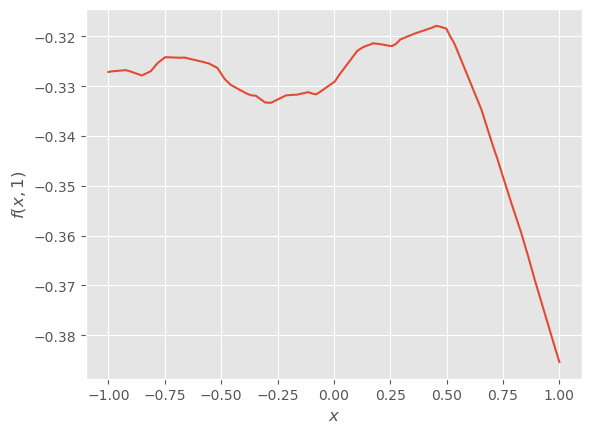

In [15]:
x_grid = np.linspace(-1, 1, num=2001)
x_ones = np.ones((2001, ))
xb = np.stack((x_grid, x_ones), -1) 
y_out = f.predict(xb)
plt.plot(x_grid, y_out)
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x,1)$")
plt.show()

To prepare $f$ for training, we can use the <code>compile</code> method to specify the loss function $\ell$ and the optimisation method. For example, we can set $\ell$ to be squared loss to be optimised with <i>SGD</i> by:

In [16]:
f.compile(optimizer="sgd", loss="mean_squared_error")

With training data, consisting of <code>N</code> samples, supplied in arrays <code>X</code> and <code>Y</code> with shapes <code>(N,2)</code> and  <code>(N,1)</code>, respectively, we could now train $f$ with minibatch size $100$ for $10$ epochs, say, by <code>f.fit(X, Y, batch_size=100, epochs=10)</code>. <b>We will return to this in the next examples, where we look into classification and regression.</b>